In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from rectpack import newPacker
import time 
%config InlineBackend.figure_format = 'svg'

In [2]:
class preProcess():
    def __init__(self):
        pass
    
    def readData(self):
        self.lingJianL0002 = pd.read_csv('L0002_lingjian.csv')  # 
        self.mianLiaoL0002 = pd.read_csv('L0002_mianliao.csv')  # 
        
    def mianLiaoSizeStrToNum(self):
       self.mianLiaoSize = self.mianLiaoL0002['面料规格'][0].split("*")
       self.mianLiaoSize = [round(float(x)) for x in self.mianLiaoSize]
       self.spacing = float(self.mianLiaoL0002['零件间最小间距'])
       return self.mianLiaoSize, self.spacing    
    
    def strToNum(self):
        self.pieces = []
        for i in range(self.lingJianL0002.shape[0]):
            self.onePiece = self.lingJianL0002.loc[i]['外轮廓']
            self.onePiece = self.onePiece.replace('[', '').replace(']]', '').split('],')
            self.onePiece = [x.strip(' ').split(',') for x in self.onePiece] 
            onePieceX = [float(x[0])  for x in self.onePiece]
            onePieceY = [float(x[1])  for x in self.onePiece]
            self.pieces.append(list(zip([x - min(onePieceX) for x in onePieceX], [y - min(onePieceY) for y in onePieceY])))
    
    def piecesNum(self):
        self.linJianNum = list(self.lingJianL0002['数量'])
    
    def rotationAngle(self):
        self.rotationAngle = []
        for i in range(self.lingJianL0002.shape[0]):
            self.rotationAngleOne = self.lingJianL0002.loc[i]['允许旋转角度']
            self.rotationAngleOne = self.rotationAngleOne.split(', ')
            self.rotationAngleOne = [float(x) for x in self.rotationAngleOne]
            self.rotationAngle.append(self.rotationAngleOne)
    
    def mianLiaoNum(self):
        self.mianLiaoNum = list(self.lingJianL0002['面料号'])
    
    def findRectangle(self):
        self.rectangle, self.rectangleSize = [], []
        for i in range(len(self.pieces)):
            x, y = zip(*self.pieces[i])
            xMax, yMax = max(x) + self.spacing / 2, max(y) + self.spacing / 2
            xMin, yMin = min(x) - self.spacing / 2, min(y) - self.spacing / 2
            width, height = xMax - xMin, yMax - yMin
            self.rectangle.append([[xMin, yMin], [xMin, yMax], [xMax, yMax], [xMax, yMin], [xMin, yMin]])
            self.rectangleSize.append([math.ceil(width), math.ceil(height), i])
        
    
    def computePiecesArea(self):
        self.piecesArea = [0 for i in range(len(self.pieces))]
        for i in range(len(self.pieces)):
            for j in range(len(self.pieces[i]) - 1):
                pNext, p = self.pieces[i][j+1], self.pieces[i][j]
                self.piecesArea[i] += 0.5 * (pNext[0] - p[0]) * (pNext[1] + p[1])
            self.piecesArea[i] = abs(self.piecesArea[i])
    
    def computeRectangleArea(self):
        self.rectangleArea = [0 for i in range(len(self.rectangleSize))]
        for i in range(len(self.rectangleSize)):
            self.rectangleArea[i] += self.rectangleSize[i][0] * self.rectangleSize[i][1] 
    
    def sortedRectangleByArea(self):
        rectSort = list(zip(self.rectangleArea, self.rectangle, self.rectangleSize))
        rectSort.sort(key=lambda x:x[0], reverse = True)
        self.rectangleArea, self.rectangle, self.rectangleSize = zip(*rectSort)
        return self.rectangleSize
        
    def computeRatePolyToRect(self):
        return sum(self.piecesArea) / sum(self.rectangleArea) 
    
    def printResults(self):
        print(self.pieces)
        print(self.linJianNum)
        print(self.rotationAngle)
        print(self.mianLiaoNum)
    
    def showPieces(self, n):
        x, y = zip(*self.pieces[n])
        plt.plot(x, y)
    
    def showRectangle(self, n):
        pieceId = self.rectangleSize[n][2]
        self.showPieces(pieceId)
        print("rectangle area: ", self.rectangleArea[n], "pieces area: ", self.piecesArea[pieceId], "bi zhi: ", self.piecesArea[pieceId] / self.rectangleArea[n])
        x, y = zip(*self.rectangle[n])
        plt.plot(x, y)
        plt.show()
        plt.savefig('rectangleResults.png')
        

In [3]:
packerData = preProcess()
packerData.readData()
mianLiaoSize, spacing = packerData.mianLiaoSizeStrToNum()
packerData.strToNum()
packerData.piecesNum()
packerData.rotationAngle()
packerData.mianLiaoNum()
packerData.findRectangle()
packerData.computePiecesArea()
packerData.computeRectangleArea()

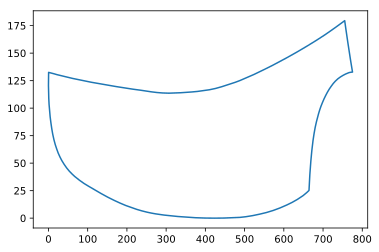

In [4]:
packerData.showPieces(1)

rectangle area:  43520 pieces area:  35356.14000000002 bi zhi:  0.8124113051470593


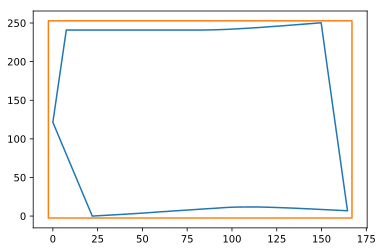

<Figure size 432x288 with 0 Axes>

In [5]:
packerData.showRectangle(8)

In [6]:
packerData.computeRatePolyToRect()

0.7121958311813013

In [7]:
rectangleSize = packerData.sortedRectangleByArea()
print(rectangleSize)

([1162, 556, 36], [1162, 556, 193], [1202, 505, 92], [1202, 505, 249], [1157, 443, 55], [1157, 443, 212], [1119, 402, 124], [1119, 402, 281], [1145, 360, 104], [1145, 360, 261], [1108, 371, 22], [1108, 371, 179], [1117, 303, 61], [1117, 303, 218], [1074, 288, 122], [1074, 288, 279], [874, 341, 93], [874, 341, 250], [894, 330, 26], [894, 330, 183], [871, 331, 49], [871, 331, 206], [846, 325, 121], [846, 325, 278], [867, 308, 30], [867, 308, 187], [842, 307, 102], [842, 307, 259], [897, 274, 113], [897, 274, 270], [917, 264, 46], [917, 264, 203], [783, 308, 14], [783, 308, 171], [784, 301, 82], [784, 301, 239], [788, 298, 0], [788, 298, 157], [793, 293, 69], [793, 293, 226], [781, 290, 149], [781, 290, 306], [763, 294, 41], [763, 294, 198], [793, 277, 135], [793, 277, 292], [778, 282, 65], [778, 282, 222], [778, 281, 2], [778, 281, 159], [738, 296, 95], [738, 296, 252], [777, 266, 142], [777, 266, 299], [821, 238, 37], [821, 238, 194], [793, 246, 99], [793, 246, 256], [829, 235, 79], [82

rectangle area:  646072 pieces area:  376995.65000000026 bi zhi:  0.5835195612872872


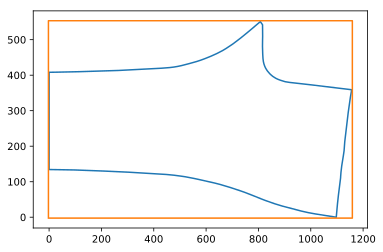

<Figure size 432x288 with 0 Axes>

In [8]:
packerData.showRectangle(0)

In [9]:
class preSolver():
    def __init__(self, rectangleSize, mianLiaoSize):
        self.rectangleSize, self.binSize = rectangleSize, [mianLiaoSize]
        self.packer = newPacker(rotation = False)
        for r in self.rectangleSize:
            self.packer.add_rect(*r)

        for b in self.binSize:
            self.packer.add_bin(*b)
    
    def solve(self):
        self.packer.pack()
        all_rects = self.packer.rect_list()
        self.rectangleSolution, self.polySolution = [], []
        self.usedArea, self.xMax, self.yMax = 0, 0, 0
        
        for rect in all_rects:
            xStart, yStart, width, height, rid = rect[1], rect[2], rect[3], rect[4], rect[5]
            self.usedArea += width * height
            x, y = [xStart, xStart + width, xStart + width, xStart, xStart], [yStart, yStart, yStart + height, yStart + height, yStart]
            self.rectangleSolution.append(list(zip(x, y)))
            if max(x) > self.xMax:
                self.xMax = max(x)
            if max(y) > self.yMax:
                self.yMax = max(y)
            
            x, y = zip(*packerData.pieces[rid])
            x, y = [x[j] + xStart for j in range(len(x))], [y[j] + yStart for j in range(len(y))]
            self.polySolution.append(list(zip(x, y)))
        return self.polySolution, self.rectangleSolution, self.xMax, self.yMax
    
    
    def showResults(self):
        print(" xMax:", self.xMax, " yMax:", self.yMax, " usedArea:", self.xMax * self.yMax)
        print(" score:", self.usedArea / (self.xMax * self.binSize[0][1]))
        print(" number of rectangle: ", len(self.rectangleSolution))
        
        plt.figure(1)
        for i in range(len(self.rectangleSolution)):
            x, y = zip(*self.rectangleSolution[i])
            plt.plot(x, y)
    
        plt.savefig('rectanglePackingResults.png', dpi = 2000)
        plt.show()  
        
        plt.figure(2)
        for i in range(len(self.polySolution)):
            x, y = zip(*self.polySolution[i])
            plt.plot(x, y)
    
        plt.savefig('rectanglePackingResults1.png', dpi = 2000)
        plt.show()

In [10]:
ind = 214
rectanglePackerSolution = preSolver(rectangleSize[0:ind], mianLiaoSize)
polySolution, rectangleSolution, xMax, yMax = rectanglePackerSolution.solve()

 xMax: 19996  yMax: 1599  usedArea: 31973604
 score: 0.9278938912782556
 number of rectangle:  214


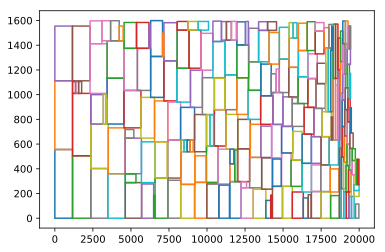

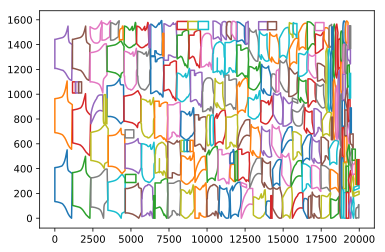

In [11]:
rectanglePackerSolution.showResults()

In [15]:
print(rectangleSolution[0])
print(rectangleSolution[-1])

[(0, 0), (1162, 0), (1162, 556), (0, 556), (0, 0)]
[(19914, 272), (19989, 272), (19989, 477), (19914, 477), (19914, 272)]
